# 07 - THE BEST ESTIMATOR - V1 
## BaggingClassifier con preselección de variables

Los modelos que vamos a poner a competir con mediante el GridSearch:

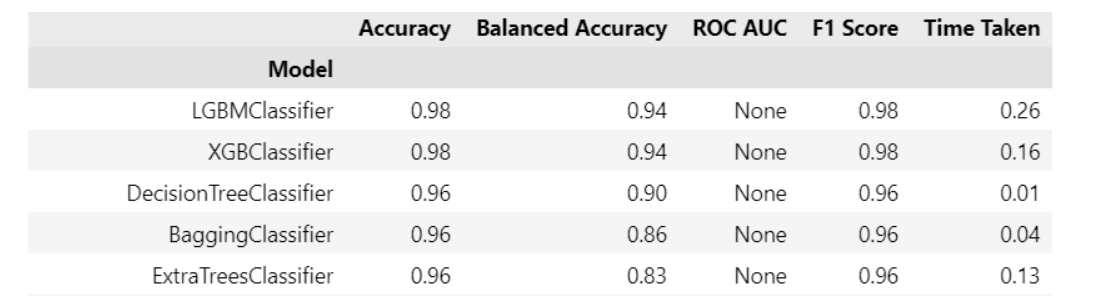

## IMPORTACIÓN DE PAQUETES

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

# Modelos

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Optimizar modelo

from sklearn.model_selection import GridSearchCV

#Métricas de evaluación

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

#Crear Pipeline
from sklearn.pipeline import Pipeline

#Guardar Modelo

import cloudpickle

## IMPORTACIÓN DE DATOS


### CARGAR LOS DATOS

### SEPARAR PREDICTIVAS Y TARGET

In [74]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_preseleccionado.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_preseleccionado.pickle')

##  MODELIZAR


### RESERVAR EL DATASET DE VALIDACIÓN

In [75]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 1)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [76]:
pipe = Pipeline([('algoritmo', XGBClassifier())])

grid = [
            {
                'algoritmo' : [LGBMClassifier()]
            },

            {
                'algoritmo' : [XGBClassifier()]        
            },

            {
                'algoritmo' : [DecisionTreeClassifier()]      
            },

            {
                'algoritmo' : [BaggingClassifier()]
            },

            {
                'algoritmo' : [ExtraTreesClassifier()]
            }
        ]

### OPTIMIZAR LOS PARÁMETROS CON GRIDSEARCH

In [77]:
grid_search = GridSearchCV(estimator= pipe,
                    param_grid= grid,
                    cv=5,
                    scoring= 'accuracy',
                    verbose= 0,
                    n_jobs= -1)

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.045683,0.001690,0.006982,0.000631,BaggingClassifier(),{'algoritmo': BaggingClassifier()},0.835294,0.794118,0.786982,0.810651,0.810651,0.807539,0.016688,1
1,0.306680,0.018587,0.007579,0.001017,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo': XGBClassifier(base_score=None, b...",0.811765,0.788235,0.786982,0.804734,0.775148,0.793373,0.013166,2
2,0.005187,0.000398,0.003591,0.000489,DecisionTreeClassifier(),{'algoritmo': DecisionTreeClassifier()},0.811765,0.788235,0.786982,0.804734,0.775148,0.793373,0.013166,2
4,0.271894,0.004940,0.028168,0.001447,ExtraTreesClassifier(),{'algoritmo': ExtraTreesClassifier()},0.811765,0.788235,0.786982,0.804734,0.775148,0.793373,0.013166,2
0,1.663857,0.084114,0.008466,0.003015,LGBMClassifier(),{'algoritmo': LGBMClassifier()},0.811765,0.764706,0.786982,0.804734,0.775148,0.788667,0.017615,5


In [78]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', BaggingClassifier())])

In [79]:
modelo.best_params_

{'algoritmo': BaggingClassifier()}

In [80]:
modelo.best_score_

0.8075391576749043

### GUARDAR MODELO.BEST_ESTIMATOR, PARÁMETROS Y SCORE

In [81]:
modelo_best_estimator = modelo
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR MODELO

### PREDECIR Y EVALUAR SOBRE EL TRAIN

#### PREDECIR SOBRE EL TRAIN

In [82]:
pred = modelo.best_estimator_.predict(train_x)

#### EVALUAR SOBRE EL TRAIN

In [83]:
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Accuracy: 0.8193624557260921
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       591
         1.0       0.60      0.69      0.64       191
         2.0       0.00      0.00      0.00        34
         3.0       0.44      0.61      0.51        31

    accuracy                           0.82       847
   macro avg       0.49      0.55      0.52       847
weighted avg       0.80      0.82      0.81       847



c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### PREDECIR SOBRE LA VALIDACIÓN

In [84]:
pred = modelo.best_estimator_.predict(val_x)

#### EVALUAR SOBRE LA VALIDACIÓN

In [85]:
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Accuracy: 0.8429752066115702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       267
         1.0       0.61      0.71      0.65        68
         2.0       0.00      0.00      0.00        14
         3.0       0.43      0.64      0.51        14

    accuracy                           0.84       363
   macro avg       0.50      0.57      0.53       363
weighted avg       0.83      0.84      0.83       363



c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gráfico entre la diferencia entre la validación y el original

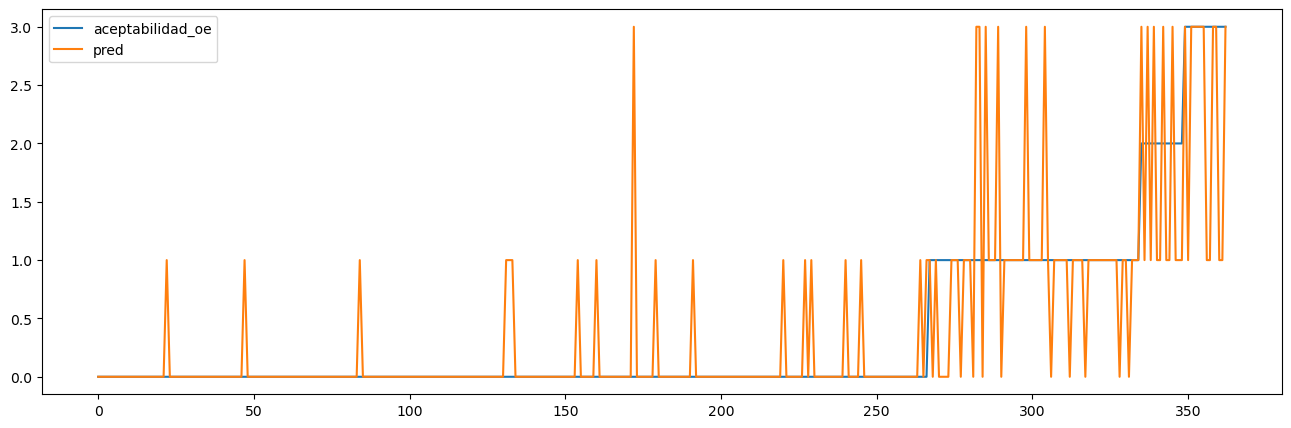

In [86]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='aceptabilidad_oe').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred[['aceptabilidad_oe','pred']].plot(figsize=(16,5));

## REPORTING DEL MODELO

Matrix de Confusión MultiClass y ROC CHART MULTICLASS

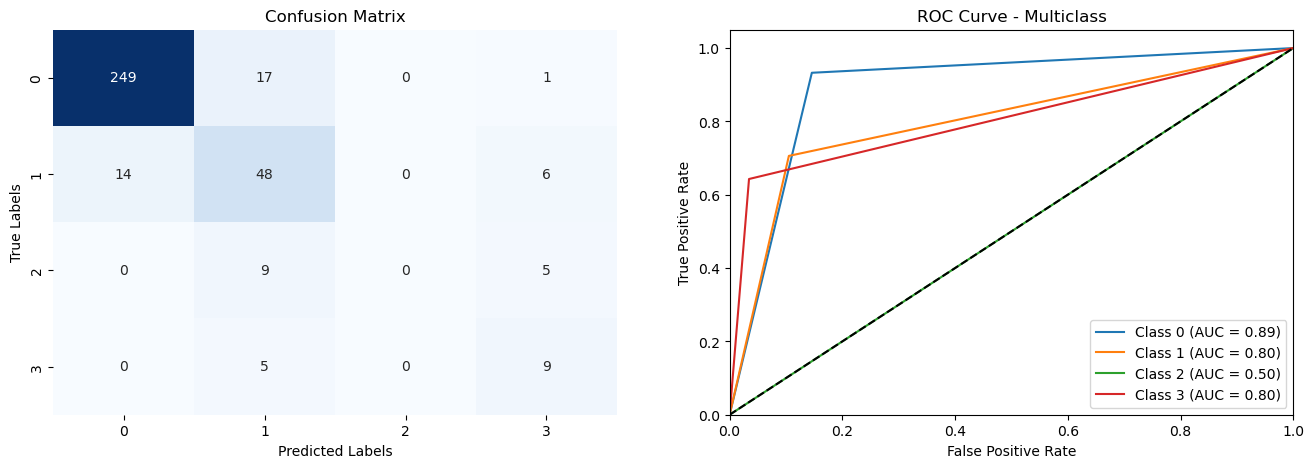

In [87]:
# Crear subplots
f, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flat

# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax[0])
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[0].set_title("Confusion Matrix")

# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(val_y))
binarized_val_y = label_binarize(val_y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    ax[1].plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve - Multiclass')
ax[1].legend(loc="lower right")


**CONCLUSIÓN**: El modelo ha dado muy buenos resultados con los datos de validación (accuracy = 98%), no se aprecia sobre-ajuste del modelo. 
De todas formas vamos a realizar un preselección de variables y generar un segundo modelo con las variables preseleccionadas sin parámetros.

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [88]:
version_estimator = '_v02'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'BaggingClassifier_v02.pickle'

In [89]:
m_best_estimator

'BaggingClassifier'

In [90]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [91]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo Base con preselección de variables (3)"
x_columns = list(x.columns)
y_target = y.name


In [92]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                    BaggingClassifier
m_Best_paramans                    {'algoritmo': BaggingClassifier()}
m_Best_Score                                       0.8075391576749043
t_accuracy                                                   0.819362
t_report                          precision    recall  f1-score   ...
v_accuracy                                                   0.842975
v_report                          precision    recall  f1-score   ...
comentarios             Modelo Base con preselección de variables (3)
predictoras_X       [nivel_seguridad_oe, n_personas_oe, precio_com...
target_y                                             aceptabilidad_oe
Name: BaggingClassifier_v02.pickle, dtype: object

In [93]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [94]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')